In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv(r'C:\Users\sivaprasad.suresh\Downloads\iris.csv',header=None) # file extraction 

In [3]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.columns=['x1','x2','x3','x4','y'] #columns renamed 

In [5]:
df.head()

,x1,x2,x3,x4,y
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
X=df[['x1','x2','x3','x4']]

In [7]:
X.head()

,x1,x2,x3,x4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
X.describe() #Identifying statistics on the x values

,x1,x2,x3,x4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df['y'].value_counts() #Identifying the number of categories 

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: y, dtype: int64

In [10]:
y={'Iris-setosa':1,'Iris-virginica':2,'Iris-versicolor':3} #Creating keys to convert the categories into numeric

In [11]:
df.y = [y[item] for item in df.y] #Converting the categories to numeric

In [12]:
df.head()

,x1,x2,x3,x4,y
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [13]:
df.isnull().sum() #Checking for null values in the data set

x1    0
x2    0
x3    0
x4    0
y     0
dtype: int64

In [14]:
y=df[['y']] 

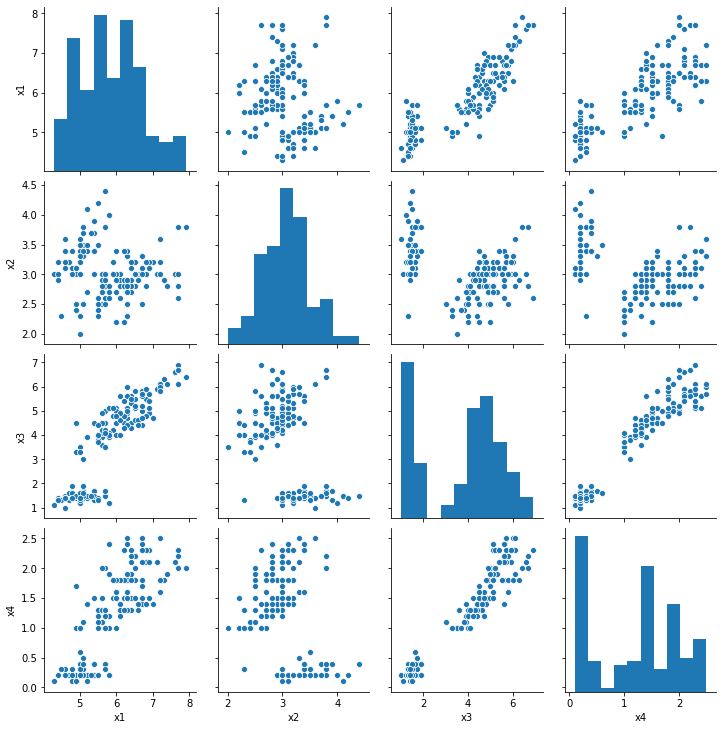

In [15]:
sns.pairplot(X) # To check whether all variables are independent

In [16]:
X.corr() # There is high correlation between x1 & x3, x1 & x4, x3 & x4

,x1,x2,x3,x4
x1,1.000000,-0.109369,0.871754,0.817954
x2,-0.109369,1.000000,-0.420516,-0.356544
x3,0.871754,-0.420516,1.000000,0.962757
x4,0.817954,-0.356544,0.962757,1.000000


In [17]:
scaler = StandardScaler() 
X = scaler.fit_transform(X) 
X = pd.DataFrame(X, columns =['x1', 'x2','x3','x4'])  # Scaling values 

In [18]:
X.head()

,x1,x2,x3,x4
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [19]:
#Running the algorithm with all independent variables
y1=y
X_train, X_test, y1_train, y1_test = train_test_split(X, y1,test_size=0.3, random_state = 42) 

In [20]:
#Training the model on Naive Bayes
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y1_train.values.ravel()) 

In [21]:
#Predict y values in test set
y1_pred = gnb.predict(X_test)

In [22]:
#Accuracy & Precision Calculation
accuracy = gnb.score(X_test, y1_test)    
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, y1_pred)
from sklearn.metrics import precision_score
precision = precision_score(y1_test, y1_pred,average='macro')
print(precision)
print(accuracy)
print(cm)

0.9761904761904763
0.9777777777777777
[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]


In [23]:
#Running the algorithm after dropping x1 & x3
X2=X.drop(['x1','x3'],axis=1)
y2=y
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,test_size=0.3, random_state = 42) 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X2_train, y2_train.values.ravel()) 
y2_pred = gnb.predict(X2_test)
accuracy = gnb.score(X2_test,y2_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_test, y2_pred)
from sklearn.metrics import precision_score
precision = precision_score(y2_test, y2_pred,average='macro')
print(precision)
print(accuracy)
print(cm)

0.9555555555555556
0.9555555555555556
[[19  0  0]
 [ 0 13  0]
 [ 0  2 11]]


In [24]:
#Running the algorithm after dropping x3 & x4
X3=X.drop(['x3','x4'],axis=1)
y3=y
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3,test_size=0.3, random_state = 42) 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X3_train, y3_train.values.ravel()) 
y3_pred = gnb.predict(X3_test)
accuracy = gnb.score(X3_test,y3_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y3_test, y3_pred)
from sklearn.metrics import precision_score
precision = precision_score(y3_test, y3_pred,average='macro')
print(precision)
print(accuracy)
print(cm)

0.8082788671023965
0.8222222222222222
[[19  0  0]
 [ 0 11  2]
 [ 0  6  7]]


In [25]:
#Running the algorithm after dropping x3 
X4=X.drop(['x3'],axis=1)
y4=y
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4,test_size=0.3, random_state = 42) 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X4_train, y4_train.values.ravel()) 
y4_pred = gnb.predict(X4_test)
accuracy = gnb.score(X4_test,y4_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y4_test, y4_pred)
from sklearn.metrics import precision_score
precision = precision_score(y4_test, y4_pred,average='macro')
print(precision)
print(accuracy)
print(cm)

0.9375
0.9333333333333333
[[19  0  0]
 [ 0 13  0]
 [ 0  3 10]]


In [26]:
#Running the algorithm after dropping x4
X5=X.drop(['x4'],axis=1)
y5=y
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5,test_size=0.3, random_state = 42) 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X5_train, y5_train.values.ravel()) 
y5_pred = gnb.predict(X5_test)
accuracy = gnb.score(X5_test,y5_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y5_test, y5_pred)
from sklearn.metrics import precision_score
precision = precision_score(y5_test, y5_pred,average='macro')
print(precision)
print(accuracy)
print(cm)

0.873015873015873
0.8888888888888888
[[19  0  0]
 [ 0 11  2]
 [ 0  3 10]]


In [27]:
#The highest accuracy is when the algorithm is run without dropping any independent variables